# Activation Maximization Visualization Technique
The technique was first proposed by Erhan et al. (2009) as a way to visualize the inputs to neurons in a particular layer of a CNN. 

### Motivation
I'm particularly interested in understanding how neural networks make decisions. This notebook and adjacent code is an attempt for me to dive deeper into the architecture of CNNs.

This notebook depends on the following files:
>`helper_functions.py`
and 
>`activation_max_vis_class.py`

**NOTE:** I don't have the visualization set up to run separatly from the notebook, however with minimal work you can easily implement it. 

In [3]:
import torch
from torch import optim
from torchvision import models, transforms
import os
import numpy as np
from PIL import Image
from PIL import ImageFile
import matplotlib.pyplot as plt
from helper_functions import process_image, rebuild_image
from activation_max_vis_class import ActivationMaximizationVis

ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

## Running the Visualizaton
Here we select the layer and filter number, download a model and run the visualization. 

Epoch 2/51 --> Loss -0.183
Epoch 3/51 --> Loss -1.433
Epoch 4/51 --> Loss -3.012
Epoch 5/51 --> Loss -5.277
Epoch 6/51 --> Loss -8.015
Epoch 7/51 --> Loss -11.176
Epoch 8/51 --> Loss -14.689
Epoch 9/51 --> Loss -18.653
Epoch 10/51 --> Loss -23.157
Epoch 11/51 --> Loss -28.037


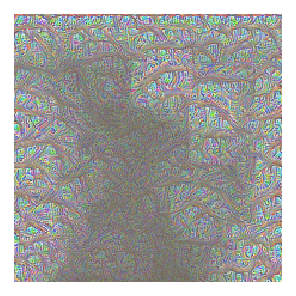

Epoch 12/51 --> Loss -33.135
Epoch 13/51 --> Loss -38.322
Epoch 14/51 --> Loss -43.497
Epoch 15/51 --> Loss -48.740
Epoch 16/51 --> Loss -54.063
Epoch 17/51 --> Loss -59.387
Epoch 18/51 --> Loss -64.713
Epoch 19/51 --> Loss -70.054
Epoch 20/51 --> Loss -75.417
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Epoch 21/51 --> Loss -80.846


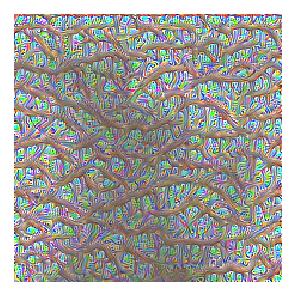

Epoch 22/51 --> Loss -86.315
Epoch 23/51 --> Loss -91.839
Epoch 24/51 --> Loss -97.397
Epoch 25/51 --> Loss -103.016
Epoch 26/51 --> Loss -108.686
Epoch 27/51 --> Loss -114.383
Epoch 28/51 --> Loss -120.121
Epoch 29/51 --> Loss -125.906
Epoch 30/51 --> Loss -131.733
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Epoch 31/51 --> Loss -137.588


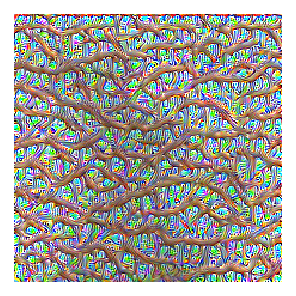

Epoch 32/51 --> Loss -143.516
Epoch 33/51 --> Loss -149.485
Epoch 34/51 --> Loss -155.509
Epoch 35/51 --> Loss -161.579
Epoch 36/51 --> Loss -167.688
Epoch 37/51 --> Loss -173.848
Epoch 38/51 --> Loss -180.035
Epoch 39/51 --> Loss -186.256
Epoch 40/51 --> Loss -192.510
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Epoch 41/51 --> Loss -198.799


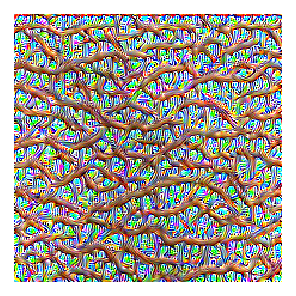

Epoch 42/51 --> Loss -205.137
Epoch 43/51 --> Loss -211.506
Epoch 44/51 --> Loss -217.916
Epoch 45/51 --> Loss -224.377
Epoch 46/51 --> Loss -230.880
Epoch 47/51 --> Loss -237.406
Epoch 48/51 --> Loss -243.979
Epoch 49/51 --> Loss -250.610
Epoch 50/51 --> Loss -257.267
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Epoch 51/51 --> Loss -263.954


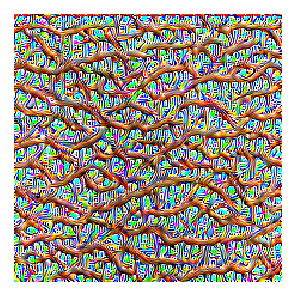

In [2]:
    cnn_layer = 16
    cnn_filter = 28
    epochs = 51
    model = models.vgg16(pretrained=True).features
    
    out_layer = ActivationMaximizationVis(model, epochs, cnn_layer, cnn_filter)
    out_layer.vis_cnn_layer()

### Testing
Just looking at the noisy image and processed image tensor.

In [4]:
# Create a noisy image
noisy_img = np.random.randint(150, 190, (224, 224, 3), dtype='uint8')

(224, 224, 3)


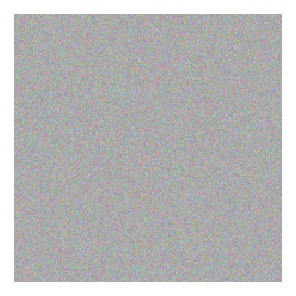

torch.Size([3, 224, 224])
<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])


In [5]:
plt.figure(figsize=[2,2])
plt.imshow(noisy_img)
print(noisy_img.shape)
plt.axis('off')
plt.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.savefig('filter_imgs/01_noisy_image.jpg', dpi=150)
plt.show()
img = process_image(noisy_img)
print(img.shape)
img.unsqueeze_(0)
print(type(img))
print(img.shape)
